In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
loan = pd.read_csv("/home/santo/Documents/upgrad_PG/loan.csv", dtype={"next_pymnt_d" : str})
loan.shape


(39717, 111)

# Data cleaning and formatting 

### Inspect null value in various columns

In [5]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Drop columns having nearly all null value

In [6]:
#drop columns having all null value
df = loan
df.columns
for col in df.columns :
    if df[col].isnull().sum() > 36000 :
        df = df.drop([col], axis=1)

#drop rows having all null value
df1 = df.dropna(how="all")

### Inspect columns with only single value

In [7]:
df.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

### Drop columns having single value

In [8]:
# Drop columns having single value
df1 = df1.drop(columns=["collections_12_mths_ex_med", "pymnt_plan", "initial_list_status", "application_type", "chargeoff_within_12_mths", "acc_now_delinq", "delinq_amnt", "tax_liens", "policy_code"])


### Format the data i.e remove unwanted suffixes.

In [9]:
# Clean data value by removing suffix character
df1["term"] = df1["term"].apply(lambda x : x.split()[0])
df1["int_rate"] = df1["int_rate"].apply(lambda x : x.removesuffix("%"))
df1["revol_util"] = df1["revol_util"].apply(lambda x : str(x).removesuffix("%"))



# Data analysis

### Get data for "Charged Off" vs "Fully Paid" vs "Current"
comparison of various attribute will be done for this three loan status to derive which attributes have significant impact on
default or paid.

In [10]:
df["emp_title"].value_counts()

emp_title
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: count, Length: 28820, dtype: int64

In [11]:
#  dataframe for all loan which are defaulted.
df_c = df1[df1["loan_status"] == "Charged Off"]

#  dataframe for all loan which are fully paid.
df_p = df1[df1["loan_status"] == "Fully Paid"]

#  dataframe for all loan which are running
df_r = df1[df1["loan_status"] == "Current"]



In [12]:
df_c["emp_title"].value_counts()


emp_title
Bank of America              20
US Army                      18
Walmart                      14
UPS                          12
AT&T                         12
                             ..
U of D Jesuit High School     1
EEOC                          1
Life Ambulance                1
R. Young Enterprise, Inc.     1
Auto motors of miami          1
Name: count, Length: 4636, dtype: int64

####  Compare [emp_length] using hist graph across each of "defaulted", "Paid", "Current"


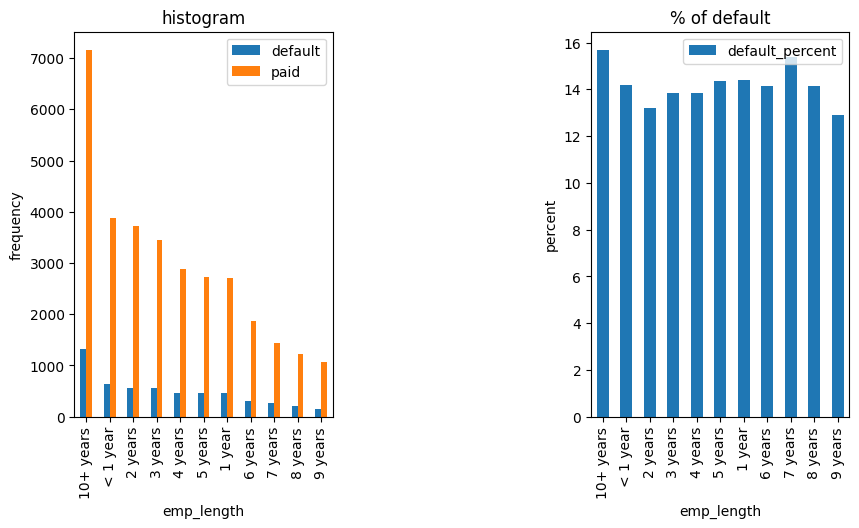

In [13]:
x = df_c["emp_length"].dropna().astype(str)
y = df_p["emp_length"].dropna().astype(str)
z = df_r["emp_length"].dropna().astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('emp_length')
ax[1].set_xlabel('emp_length')
plt.show()


**observation:**  - 
- High chances of default : **"10+ years", "7 years"**
- Lowest chances of default : **"2 years" , "9 years"**

#### Compare [grade] using hist graph across each of "defaulted", "Paid", "Current"


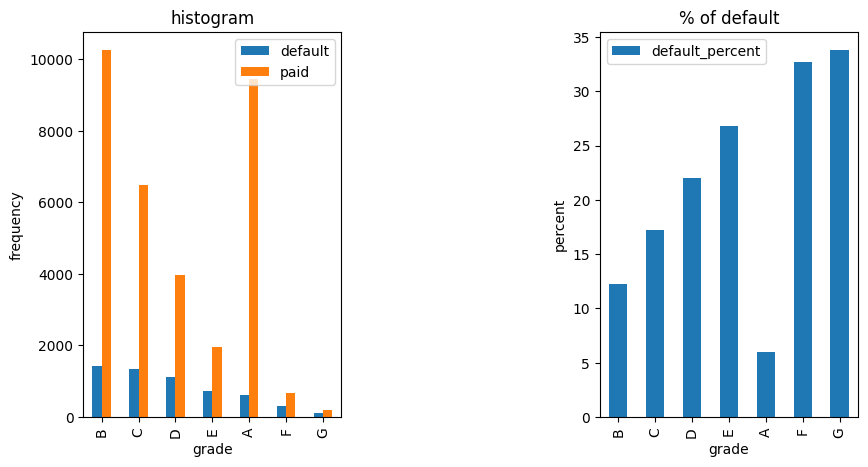

In [14]:

x = df_c["grade"].astype(str)
y = df_p["grade"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100


pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('grade')
ax[1].set_xlabel('grade')
    
plt.show()



**observation:**
- High chances of default : **"Grade F", " Grade G"**
- Lowest chances of default : **"Grade A"**

#### Compare [zip_code] using hist graph across each of "defaulted", "Paid", "Current"


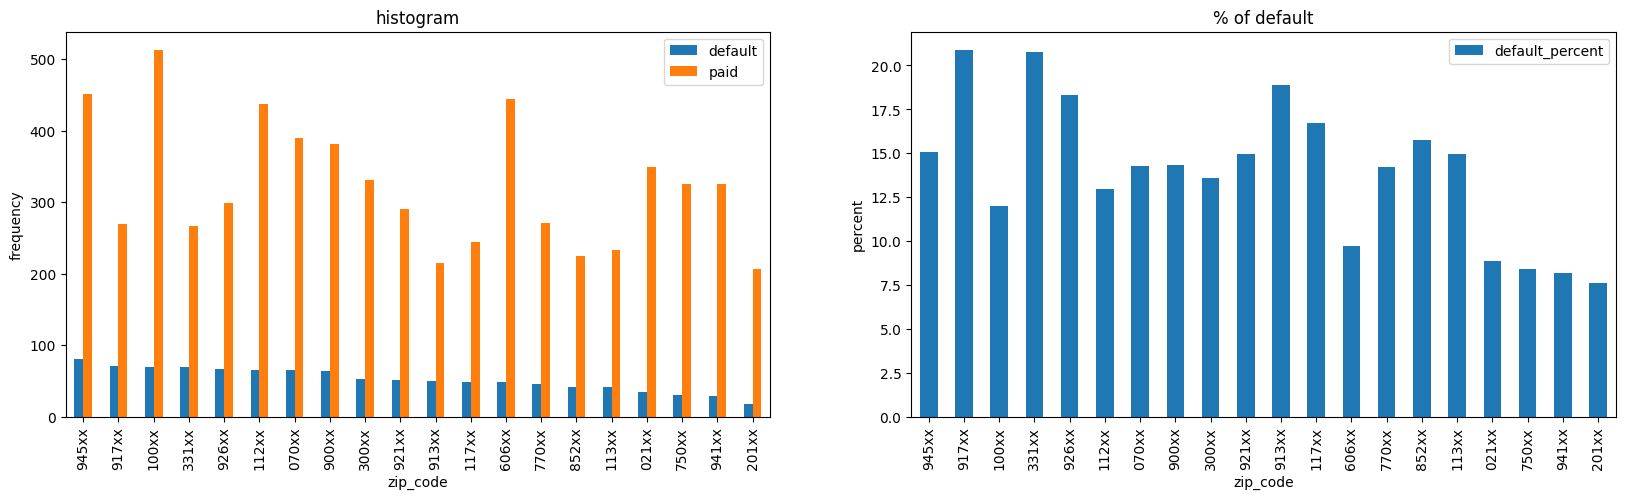

In [15]:
#df_c.loc[:, ["zip_code"]] = df_c["zip_code"].apply(lambda x : x[:-2])
df_c.loc[:, ["zip_code"]] = df_c[df_c["zip_code"].notna()]

#df_p.loc[:, ["zip_code"]] = df_p["zip_code"].apply(lambda x : x[:-2])
df_p.loc[:, ["zip_code"]] = df_p[df_p["zip_code"].notna()]

# dropna value
x = df_c["zip_code"]
x = x.dropna()
y = df_p["zip_code"]
x = x.dropna()


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(20,5));
#fig.subplots_adjust(wspace=1, hspace=0.1)
s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"] 
pp['index1'] = pp.index

pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 200)]

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('zip_code')
ax[1].set_xlabel('zip_code')
    
plt.show()

**observation:**
- High chances of default : **"971xx", " 331xx"**
- Lowest chances of default : **"201xx", 941xx**

#### Compare [addr_state] using hist graph across each of "defaulted", "Paid", "Current"


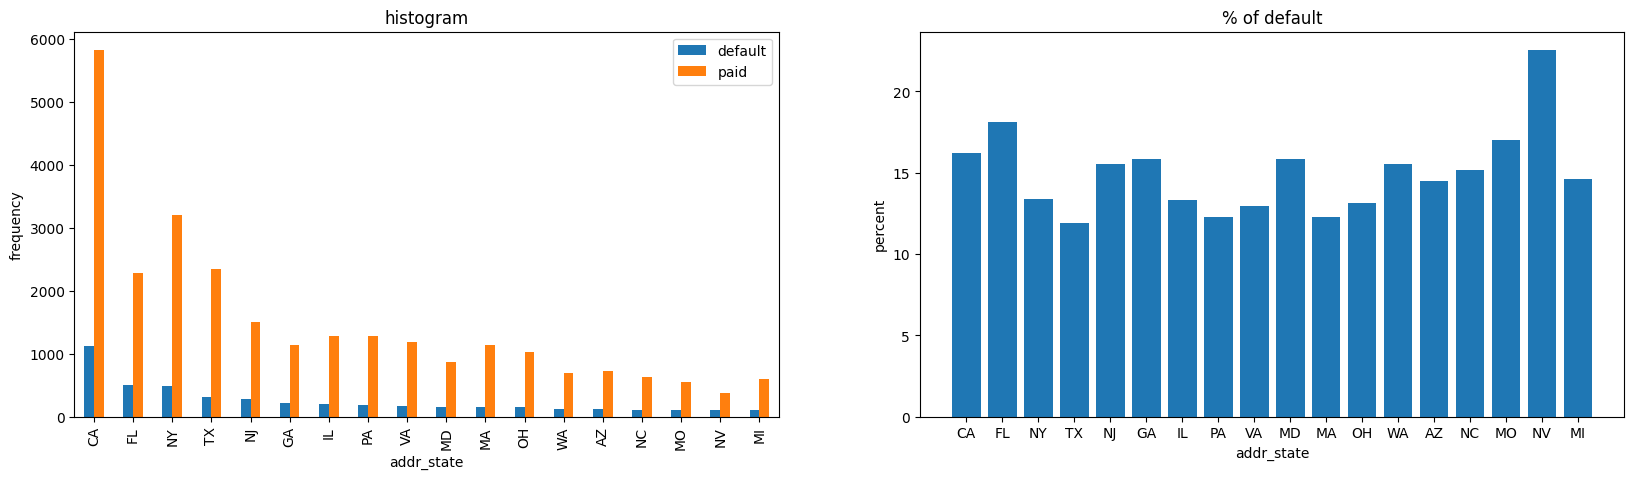

In [16]:

x = df_c["addr_state"].astype(str)
y = df_p["addr_state"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(20,5));
#fig.subplots_adjust(wspace=1, hspace=0.1)
s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp = pp.loc[(pp["default"] > 100) & (pp["paid"] > 100)]
pp['index1'] = pp.index

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

    
pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
ax[1].bar(x=pp.index1,height=pp["default_percent"])


ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('addr_state')
ax[1].set_xlabel('addr_state')
    
plt.show()

**observation:**

- High chances of default : **"NV and FL"**  
- Lowest chances of default :**"TX"**

#### Compare sub_grade variation using hist graph across each of "defaulted", "Paid", "Current"


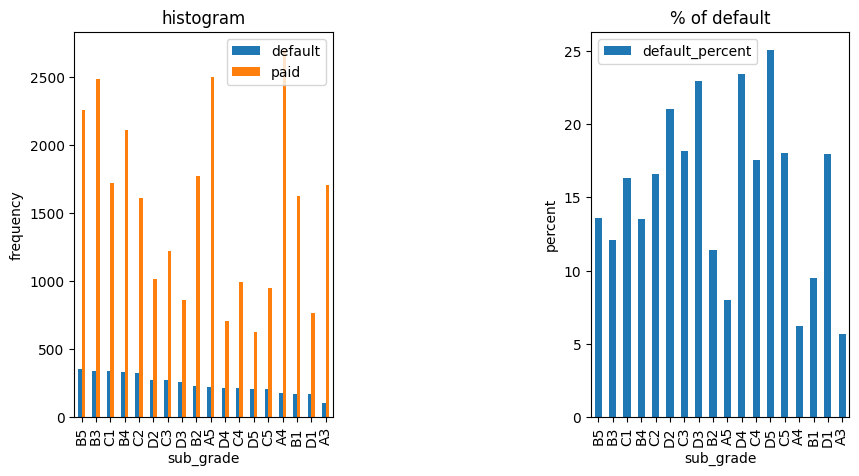

In [17]:
x = df_c["sub_grade"].astype(str)
y = df_p["sub_grade"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 100) & (pp["paid"] > 600)]

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('sub_grade')
ax[1].set_xlabel('sub_grade')
plt.show()


**observation:**
    
- High chances of default : **"D5 and D4"**  
- Lowest chances of default :**"A3 and A4"**

#### Compare [emp_title] variation using hist graph across each of "defaulted", "Paid", "Current"


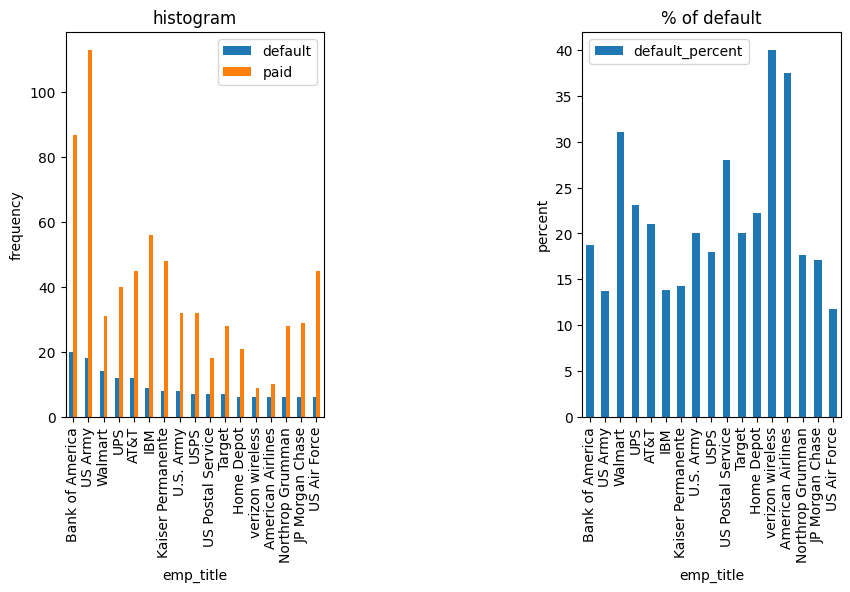

In [18]:
counts = df_c["emp_title"].value_counts()
counts = counts.index[counts.values > 5]

x = df_c[df_c["emp_title"].isin(counts)]
y = df_p[df_p["emp_title"].isin(counts)]

x = x["emp_title"].astype(str)
y = y["emp_title"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('emp_title')
ax[1].set_xlabel('emp_title')
plt.show()



**observation:**

- High chances of default : **"American airlines  and verizon wireless"**  
- Lowest chances of default :**"US air force"**

### Compare [loan_amnt] variation using hist graph across each of "defaulted", "Paid", "Current"**


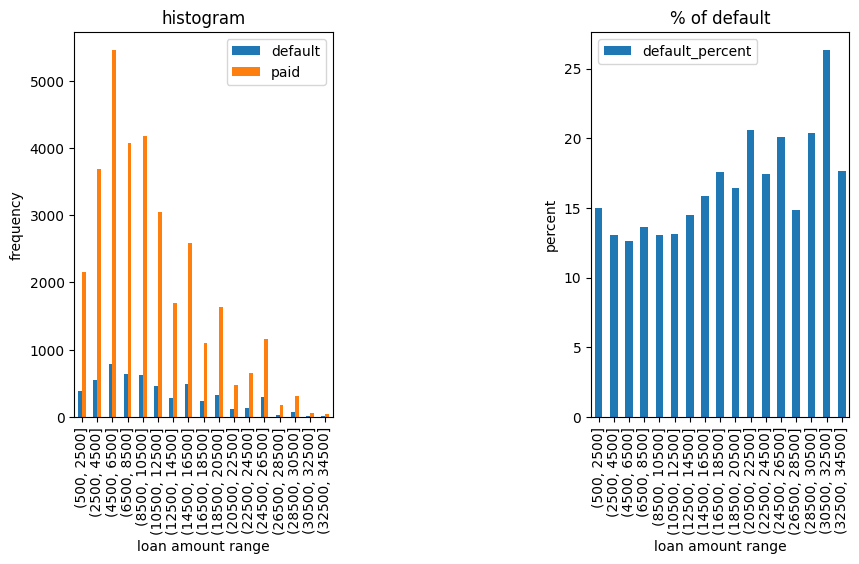

In [19]:

x = df_c["loan_amnt"].astype(int)
y = df_p["loan_amnt"].astype(int)


min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=2000, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('loan amount range')
ax[1].set_xlabel('loan amount range')
plt.show()


**observation:**

- High chances of default : **"30500 - 32500"**  
- Lowest chances of default :**"4500-6500"**

#### Compare [purpose] variation using hist graph across each of "defaulted", "Paid", "Current"


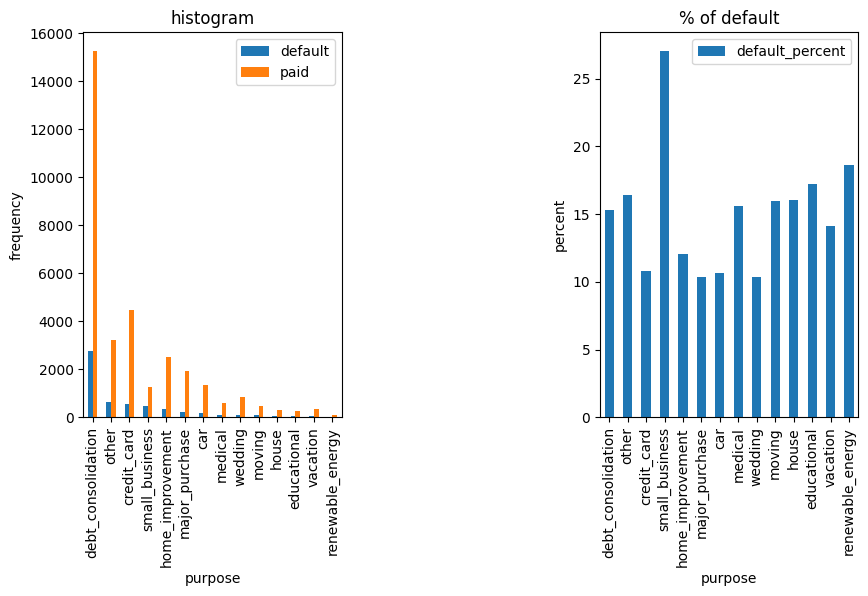

In [20]:

x = df_c["purpose"].astype(str)
y = df_p["purpose"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

s1 = x.value_counts()
s2 = y.value_counts()
pp = pd.concat([s1, s2], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]

pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[1].set_ylabel('percent')
ax[1].set_title('% of default')
ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[0].set_ylabel('frequency')

ax[0].set_xlabel('purpose')
ax[1].set_xlabel('purpose')
plt.show()


**observation:**

- High chances of default : **small business, renewable energy**  
- Lowest chances of default :**major purchase, car, wedding**

#### Compare [pub_rec_bankruptcies] using hist graph across each of "defaulted", "Paid", "Current"


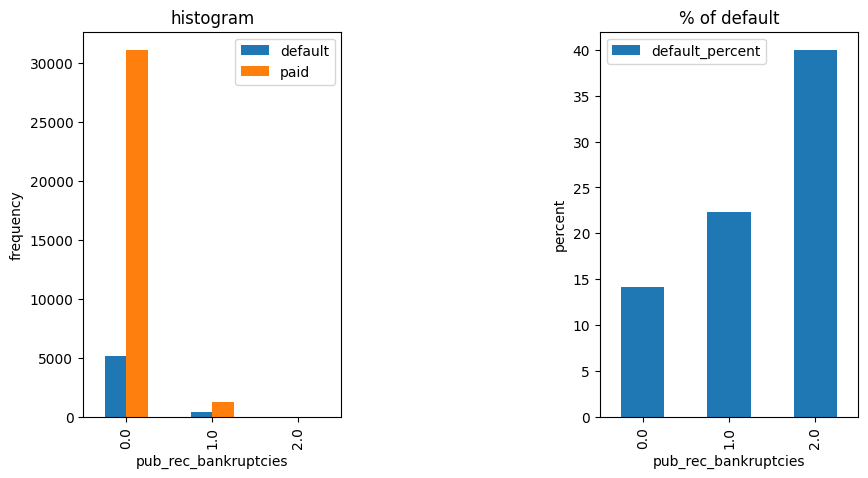

In [21]:
### Compare [pub_rec_bankruptcies] using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["pub_rec_bankruptcies"].dropna().astype(str)
y = df_p["pub_rec_bankruptcies"].dropna().astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_xlabel('pub_rec_bankruptcies')
ax[1].set_xlabel('pub_rec_bankruptcies')
plt.show()

**observation:**

> Chances of default increases with pub_rec_bankruprcies

#### Compare [int_rate] variation using hist graph across each of "defaulted", "Paid", "Current"


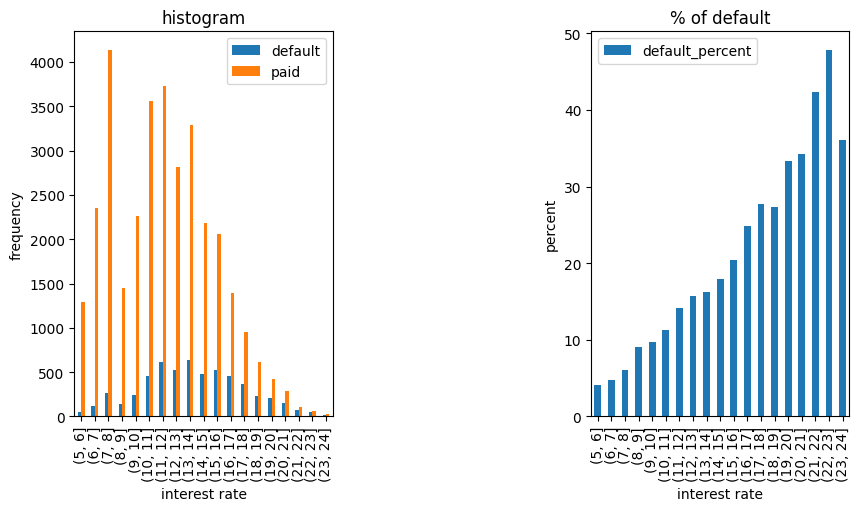

In [22]:

x = df_c["int_rate"].astype(float)
y = df_p["int_rate"].astype(float)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.linspace(start=min1,stop=max1, num=20, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('interest rate')
ax[1].set_xlabel('interest rate')
plt.show()


**observation:**  
    - Chances of default increases with increase in interest rate

#### Compare home_ownership variation using hist graph across each of "defaulted", "Paid", "Current"


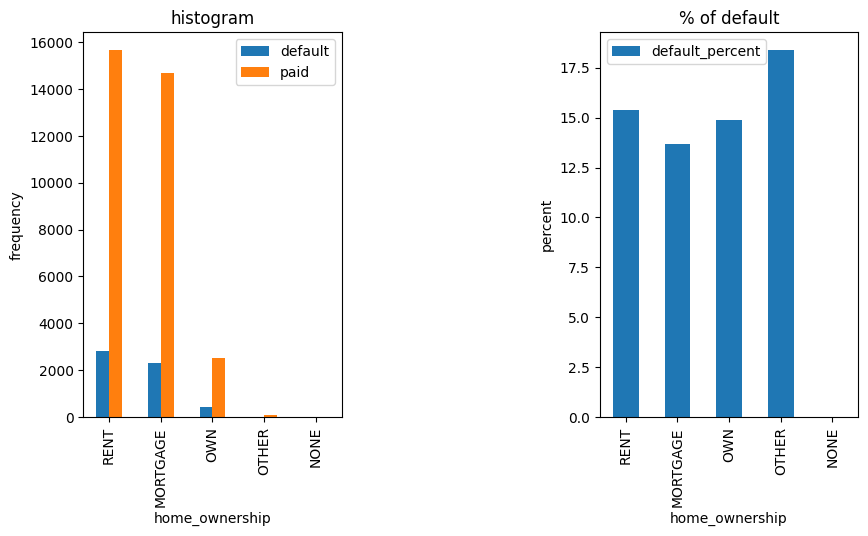

In [23]:
#Compare home_ownership variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["home_ownership"].astype(str)
y = df_p["home_ownership"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_xlabel('home_ownership')
ax[1].set_xlabel('home_ownership')
plt.show()

**observation:**
- High chances of default : OTHER category
- Low chances of default : MORTAGAGE

#### Compare verification_status variation using hist graph across each of "defaulted", "Paid", "Current"


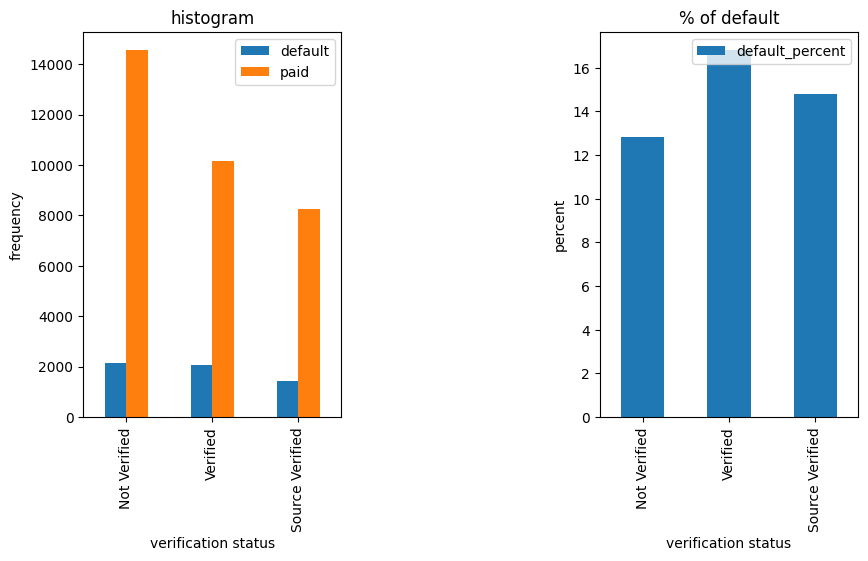

In [24]:

x = df_c["verification_status"].astype(str)
y = df_p["verification_status"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_xlabel('verification status')
ax[1].set_xlabel('verification status')
plt.show()

**observation:**
- Default count decreses with better verification status

#### Compare [term] variation using hist graph across each of "defaulted", "Paid", "Current"


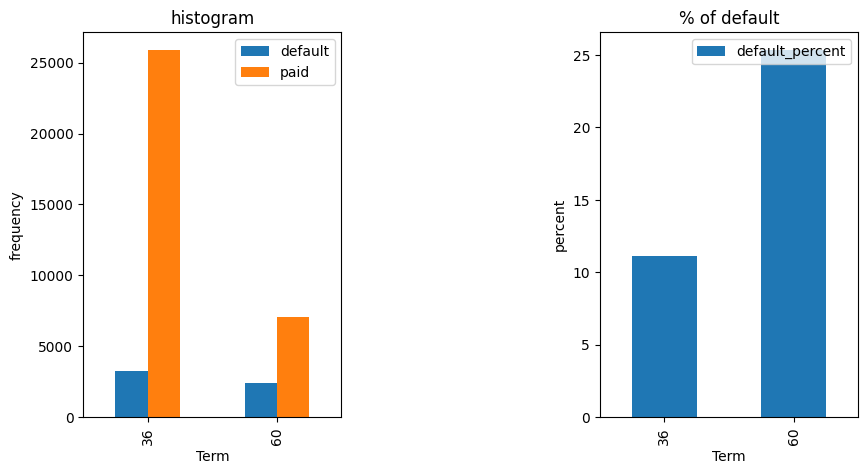

In [25]:
#Compare term variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["term"].astype(str)
y = df_p["term"].astype(str)

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_xlabel('Term')
ax[1].set_xlabel('Term')
plt.show()

**observation:**
- Term with 60 month has very high chances of default

#### Compare [installment] variation using hist graph across each of "defaulted", "Paid", "Current"


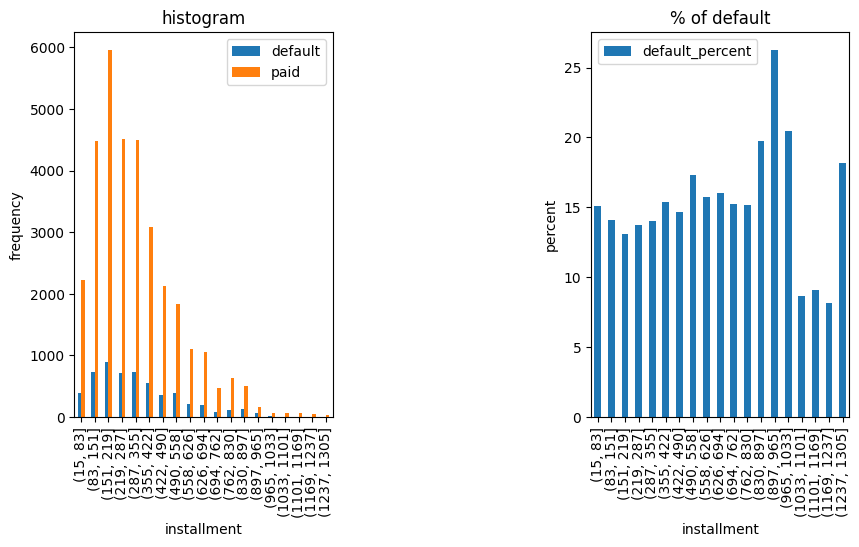

In [26]:
x = df_c["installment"].astype(float)
y = df_p["installment"].astype(float)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.linspace(start=min1,stop=max1, num=20, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
#pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('installment')
ax[1].set_xlabel('installment')
plt.show()

**observation:**
- High chances of default between : 803-1033
- Low chances of default: 1033 - 1237

#### Compare [annual_inc] variation using hist graph across each of "defaulted", "Paid", "Current"


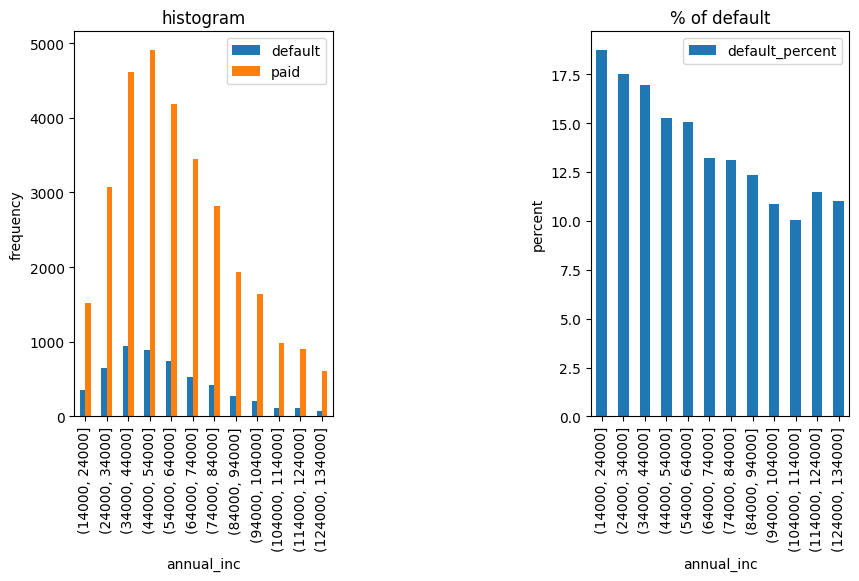

In [27]:

x = df_c["annual_inc"].astype(int)
y = df_p["annual_inc"].astype(int)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=10000, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 500)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('annual_inc')
ax[1].set_xlabel('annual_inc')
plt.show()

**observation:**
- Chances of Default decreses significantly with increase in annual income but increase slighty with highst annual income

#### Compare [delinq_2yrs] variation using hist graph across each of "defaulted", "Paid", "Current"


#### Compare [last_credit_pull_d] variation using hist graph across each of "defaulted", "Paid", "Current"


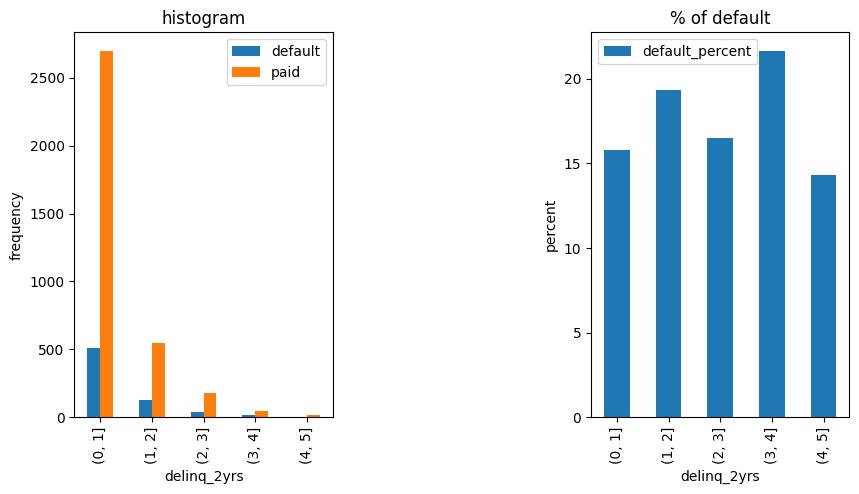

In [28]:

x = df_c["delinq_2yrs"].astype(int)
y = df_p["delinq_2yrs"].astype(int)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=1, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('delinq_2yrs')
ax[1].set_xlabel('delinq_2yrs')
plt.show()

**observation:**
- Not much significant pattern seen

#### Compare [last_credit_pull_d] variation using hist graph across each of "defaulted", "Paid", "Current"


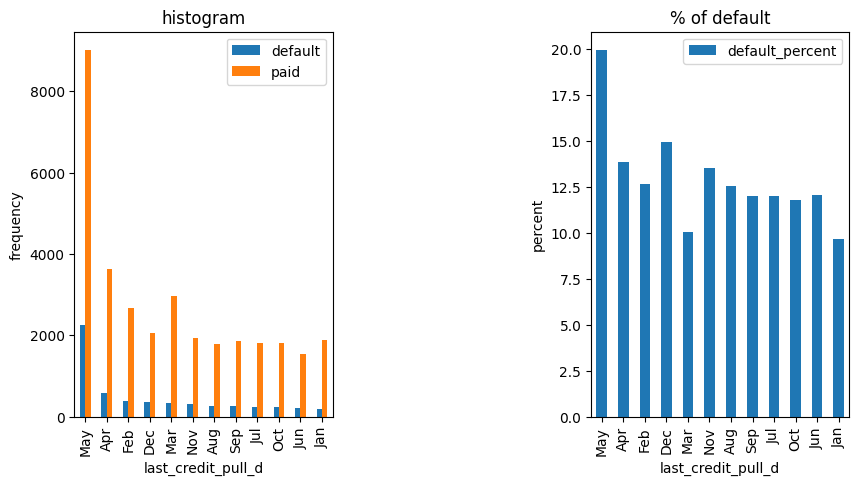

In [29]:
x = df_c["last_credit_pull_d"].apply(lambda x : str(x)[0:3])
y = df_p["last_credit_pull_d"].apply(lambda x : str(x)[0:3])
z = df_r["last_credit_pull_d"].apply(lambda x : str(x)[0:3])
x = x.dropna()
y = y.dropna()
z = z.dropna()

fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_xlabel('last_credit_pull_d')
ax[1].set_xlabel('last_credit_pull_d')
plt.show()

**Observation**
- if last_credit_pull date month is May then chance of default is increases"

#### Compare [open_acc] variation using hist graph across each of "defaulted", "Paid", "Current"


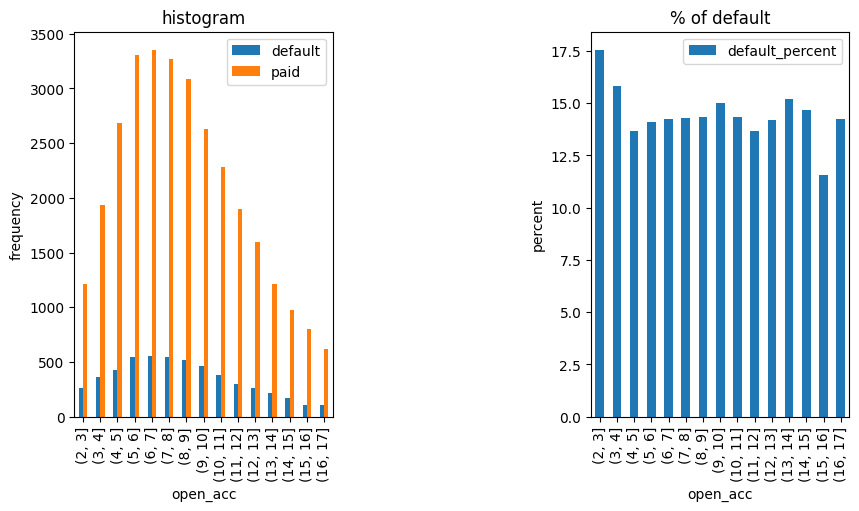

In [30]:
#Compare [open_acc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["open_acc"].astype(int)
y = df_p["open_acc"].astype(int)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=1, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 500)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('open_acc')
ax[1].set_xlabel('open_acc')
plt.show()

**Observation**
- High chances of default if open account number is 2-4

#### Compare [total_acc] variation using hist graph across each of "defaulted", "Paid", "Current"


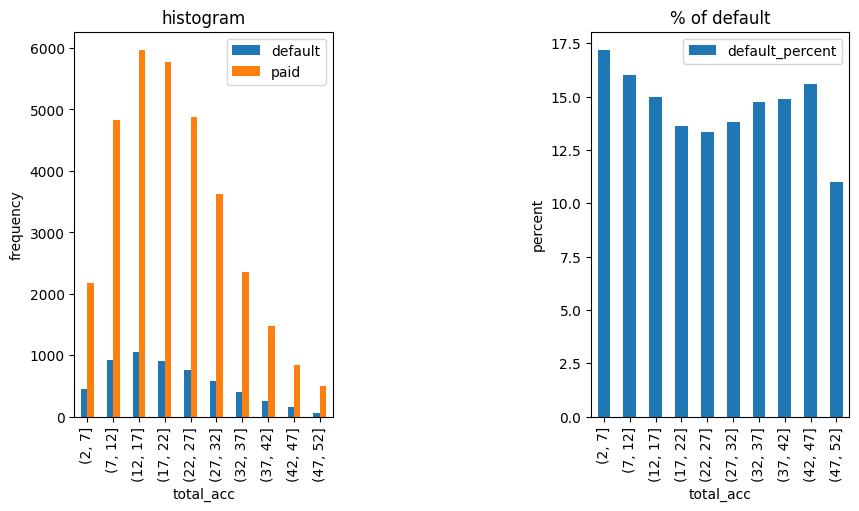

In [31]:
#Compare [total_acc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["total_acc"].astype(float)
y = df_p["total_acc"].astype(float)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=5, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 500)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('total_acc')
ax[1].set_xlabel('total_acc')
plt.show()

**Observation**
- High chances of default if total account number is 2-7

#### Compare [dti] variation using hist graph across each of "defaulted", "Paid", "Current"


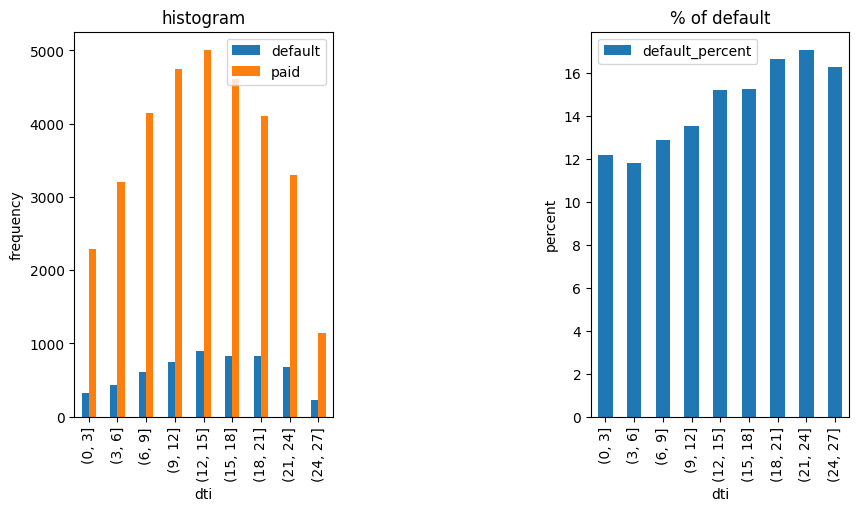

In [32]:
#Compare [dti] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["dti"].astype(float)
y = df_p["dti"].astype(float)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=3, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 500)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('dti')
ax[1].set_xlabel('dti')
plt.show()

**Observation**
- Default chance increases with increase in "Debt to income ratio"

#### Compare [inq_last_6mths] variation using hist graph across each of "defaulted", "Paid", "Current"


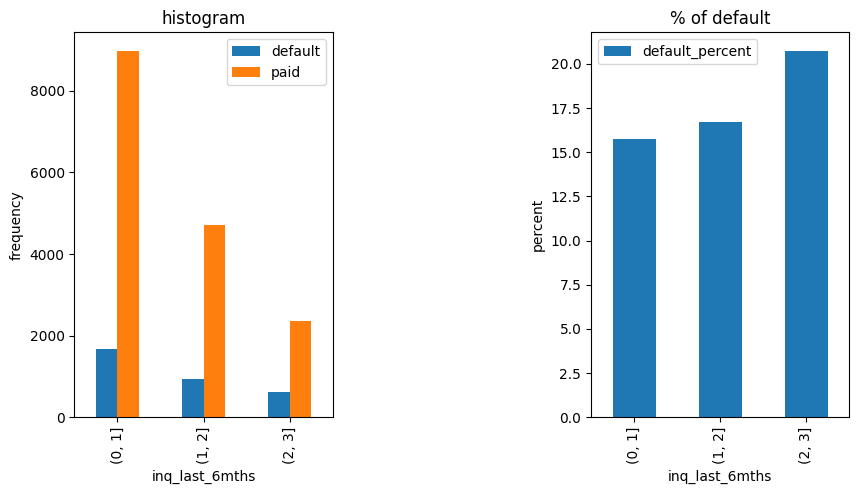

In [33]:
#Compare [inq_last_6mths] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["inq_last_6mths"]
y = df_p["inq_last_6mths"]

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=1, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 500)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('inq_last_6mths')
ax[1].set_xlabel('inq_last_6mths')
plt.show()

**Observation**
- Default chance increases with increase in "inq_last_months"

#### Compare [total_acc] variation using hist graph across each of "defaulted", "Paid", "Current"
    

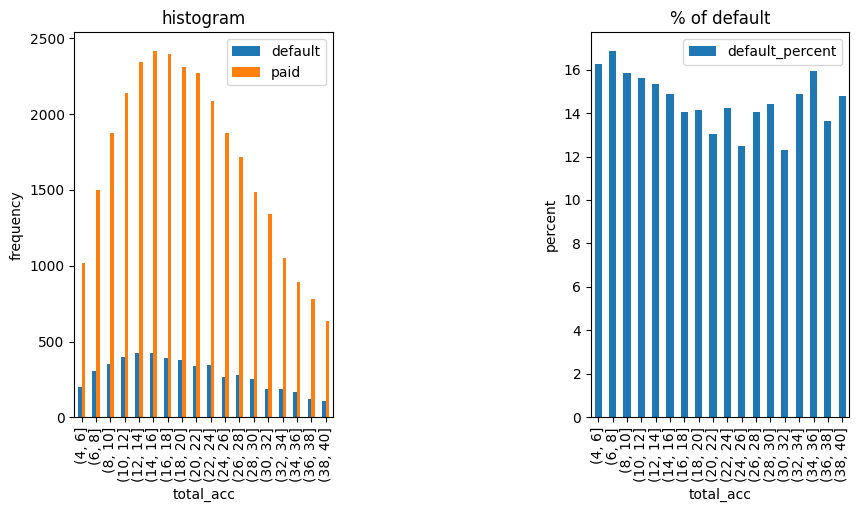

In [34]:
#Compare [total_acc] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["total_acc"].astype(int)
y = df_p["total_acc"].astype(int)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=2, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 500)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100
#pp = pp.loc[(pp["default_percent"] > np.percentile(pp["default_percent"], 50) )]


pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('total_acc')
ax[1].set_xlabel('total_acc')
plt.show()

**Observation**
- Default chance increases with less number of total account

#### Compare [total_rec_prncp] variation using hist graph across each of "defaulted", "Paid", "Current"


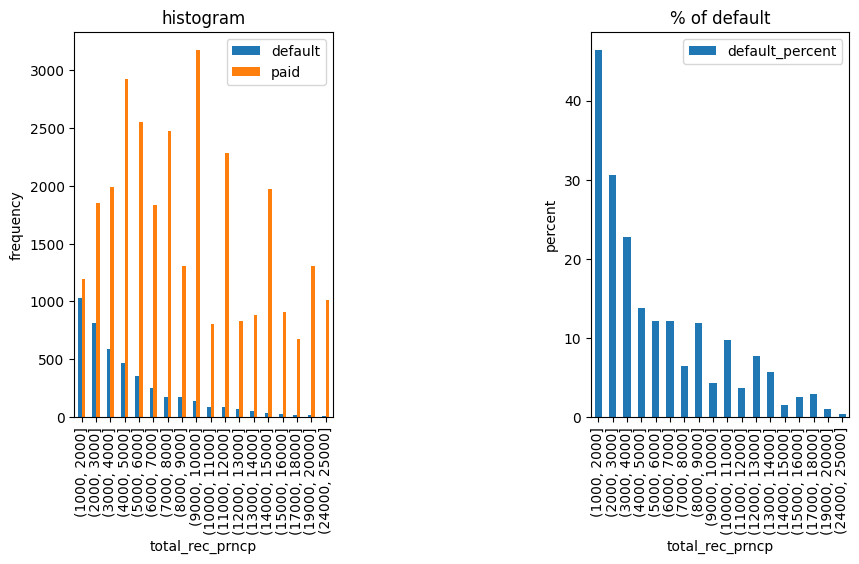

In [35]:
#Compare [total_rec_prncp] variation using hist graph across each of "defaulted", "Paid", "Current"

x = df_c["total_rec_prncp"].astype(int)
y = df_p["total_rec_prncp"].astype(int)

min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=1000, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 500)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100
#pp = pp.loc[(pp["default_percent"] > np.percentile(pp["default_percent"], 50) )]


pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('total_rec_prncp')
ax[1].set_xlabel('total_rec_prncp')
plt.show()



**Observation**
- Default chance increases with lesser value of "total_rec_prncp"

#### Compare [revol_bal] variation using hist graph across each of "defaulted", "Paid", "Current"


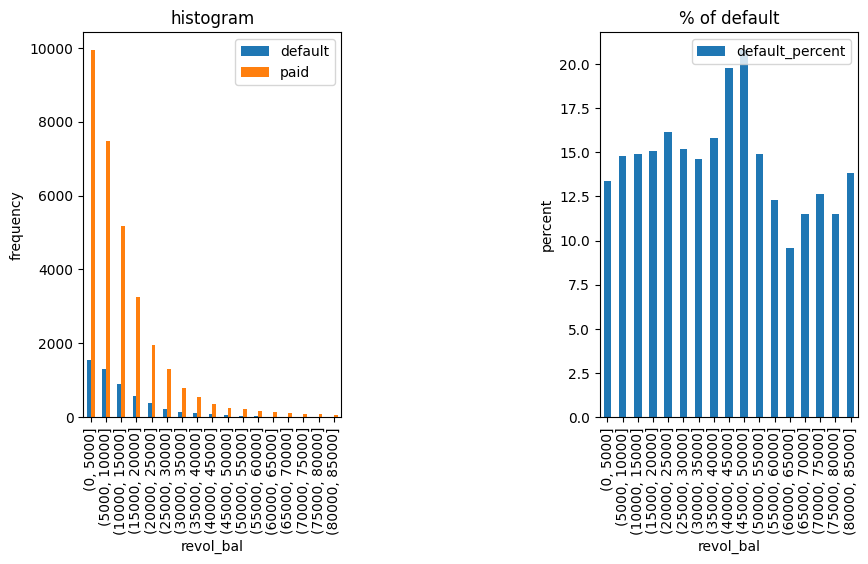

In [36]:
#Compare [revol_bal] variation using hist graph across each of "defaulted", "Paid"

x = df_c["revol_bal"].astype(int)
y = df_p["revol_bal"].astype(int)
min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=5000, dtype=int);

x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 50)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100
#pp = pp.loc[(pp["default_percent"] > np.percentile(pp["default_percent"], 50) )]


pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('revol_bal')
ax[1].set_xlabel('revol_bal')
plt.show()


**Observation**
- Default chance increases when "revol_bal" is around 40k - 50k

#### Compare [total_rec_int] variation using hist graph across each of "defaulted", "Paid", "Current"


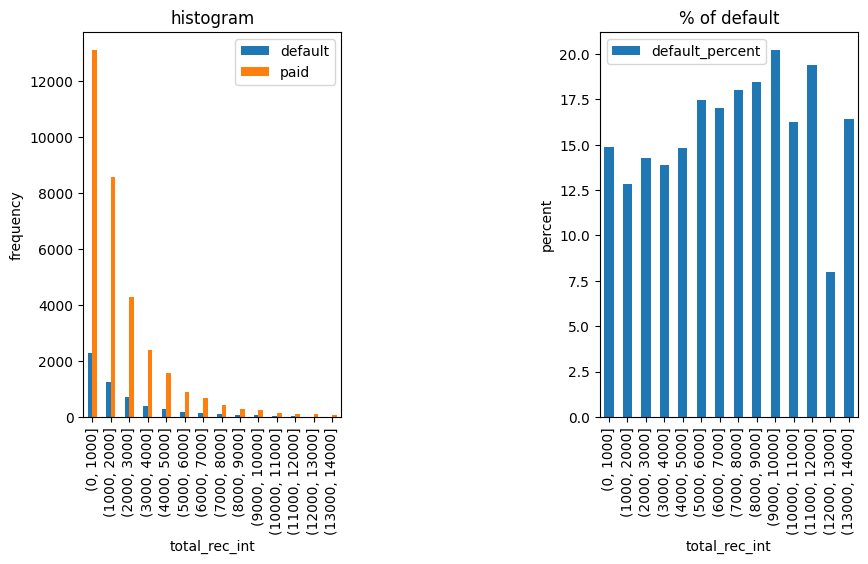

In [37]:
#Compare [total_rec_int] variation using hist graph across each of "defaulted", "Paid"

x = df_c["total_rec_int"].astype(int)
y = df_p["total_rec_int"].astype(int)
min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.arange(start=min1,stop=max1, step=1000, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 50)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100
#pp = pp.loc[(pp["default_percent"] > np.percentile(pp["default_percent"], 50) )]
    

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('total_rec_int')
ax[1].set_xlabel('total_rec_int')
plt.show()



**Observation**
- Default chance is lowest when "total_rec_int" is around 12k-13k

#### Compare [total_rec_late_fee] variation using hist graph across each of "defaulted", "Paid", "Current"


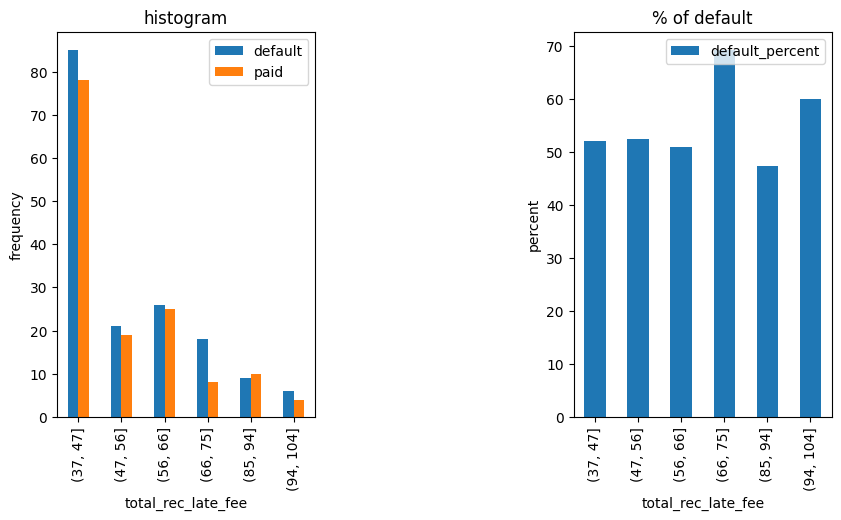

In [38]:
#Compare [total_rec_late_fee] variation using hist graph across each of "defaulted", "Paid"

x = df_c["total_rec_late_fee"].astype(float)
y = df_p["total_rec_late_fee"].astype(float)
min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.linspace(start=min1,stop=max1, num=20, dtype=int);

x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100
pp = pp.loc[(pp["default_percent"] > np.percentile(pp["default_percent"], 50) )]
    

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('total_rec_late_fee')
ax[1].set_xlabel('total_rec_late_fee')
plt.show()


**Observation**
- Default chance is higher when "total_rec_late_fee" is around 66-75

#### Compare [collection_recovery_fee] variation using hist graph across each of "defaulted", "Paid", "Current"


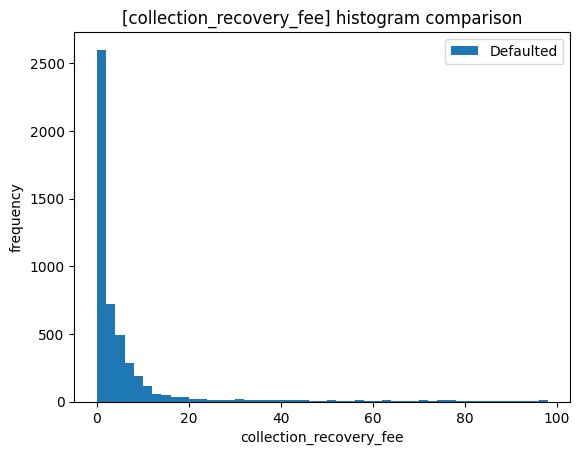

In [39]:
#Compare [collection_recovery_fee] variation using hist graph across each of "defaulted", "Paid"

x = df_c["collection_recovery_fee"].astype(int)
y = df_p["collection_recovery_fee"].astype(int)
o1, o2, o3 = plt.hist([x], label=['Defaulted', 'Paid'], bins=np.arange(0,100,2))
#plt.xticks(range(len(x.columns)),rotation=100)

plt.legend(loc='upper right')
plt.title('[collection_recovery_fee] histogram comparison')
plt.xlabel('collection_recovery_fee')
plt.ylabel('frequency')
plt.show()



**Observation**
- Default number decreases if collection_Recovery_fee is higher

#### Compare [total_pymnt] variation using hist graph across each of "defaulted", "Paid", "Current"


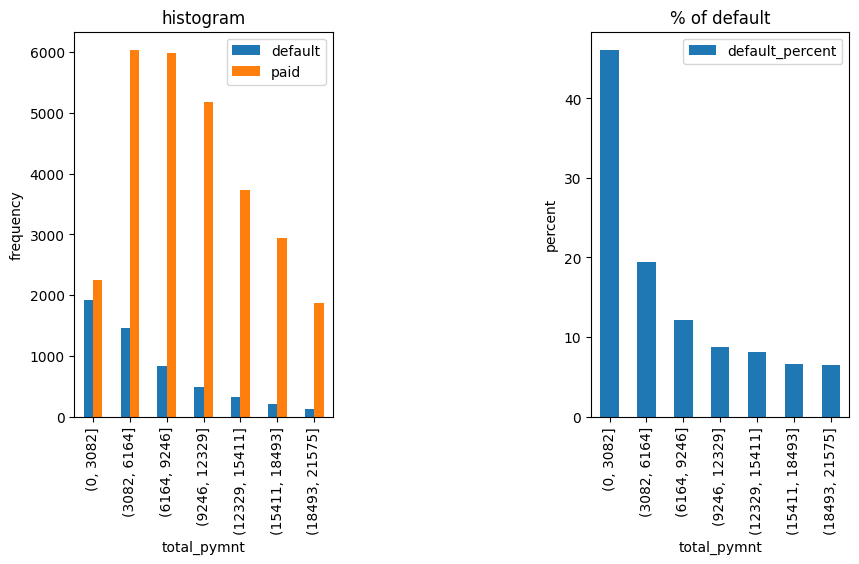

In [40]:
#Compare [total_pymnt] variation using hist graph across each of "defaulted", "Paid"

x = df_c["total_pymnt"].astype(int)
y = df_p["total_pymnt"].astype(int)
min1 = np.min(x) if np.min(x) < np.min(y)  else np.min(y) 
max1 = np.max(x) if np.max(x) > np.max(y)  else np.max(y) 
bin1 = np.linspace(start=min1,stop=max1, num=20, dtype=int);
x = pd.cut(np.array(x), bins=bin1)
y = pd.cut(np.array(y), bins=bin1)


fig,ax = plt.subplots(ncols=2, nrows=1, figsize=(10,5));
fig.subplots_adjust(wspace=1, hspace=1)

pp = pd.concat([x.value_counts(), y.value_counts()], axis=1)
pp.columns = [ "default", "paid"]
pp['index1'] = pp.index
pp = pp.loc[(pp["default"] > 1) & (pp["paid"] > 1)]
pp["default_percent"] = pp["default"]/(pp["paid"] + pp["default"]) * 100
pp = pp.loc[(pp["default_percent"] > np.percentile(pp["default_percent"], 50) )]
    

pp.plot.bar(ax=ax[0], x="index1",y=["default","paid"])
pp.plot.bar(ax=ax[1], x="index1",y=["default_percent"])

ax[0].legend(loc='upper right')
ax[0].set_ylabel('frequency')
ax[1].set_ylabel('percent')
ax[0].set_title('histogram')
ax[1].set_title('% of default')
ax[0].set_xlabel('total_pymnt')
ax[1].set_xlabel('total_pymnt')
plt.show()


**Observation**
- Default chances are higher if total_payment till now is lesser

## Compare attribute variation using box plots


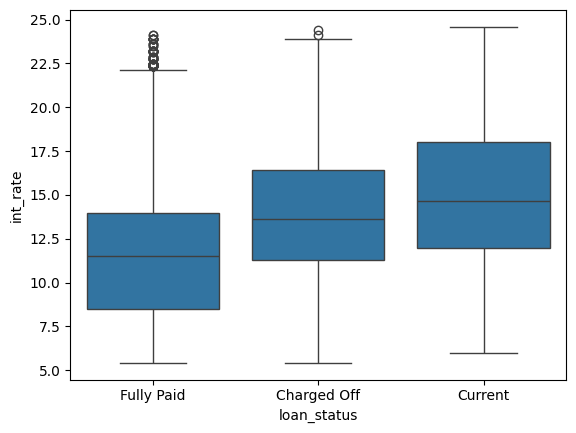

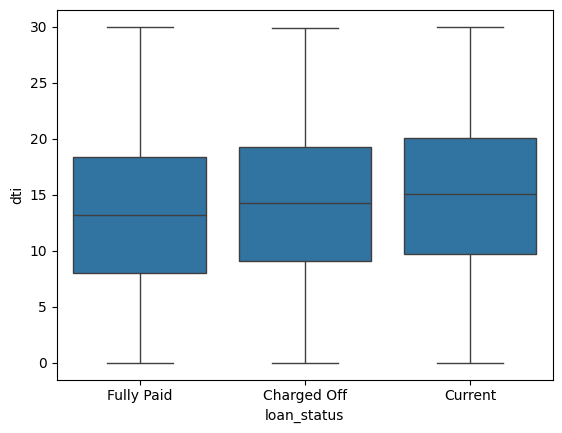

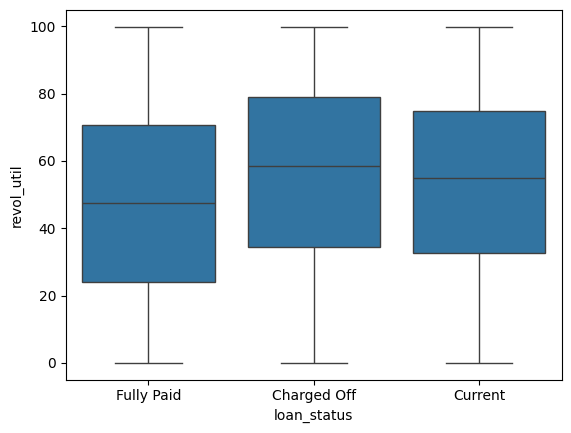

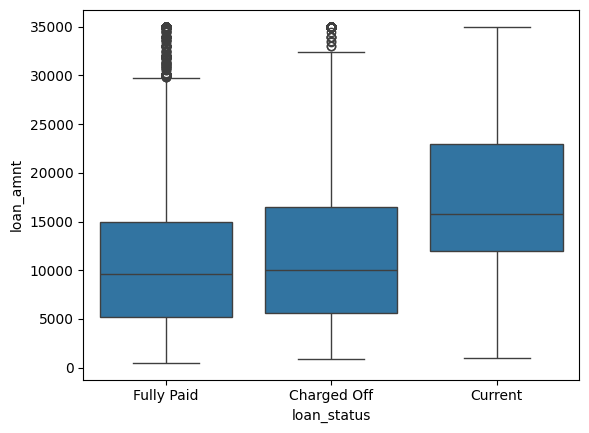

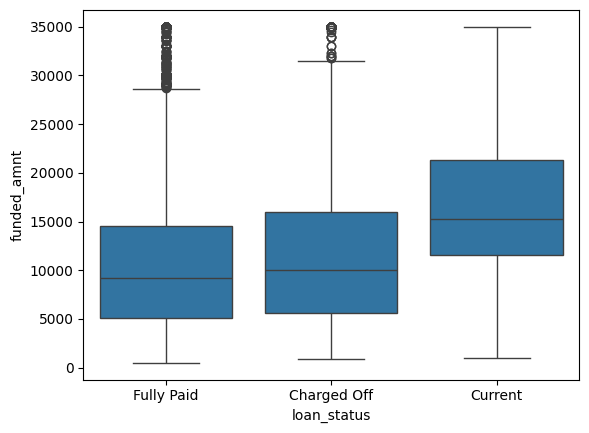

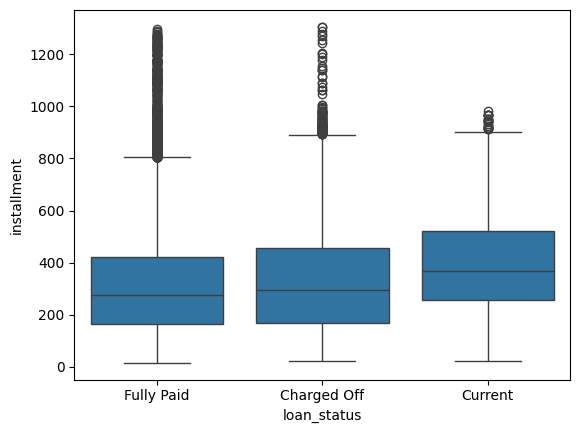

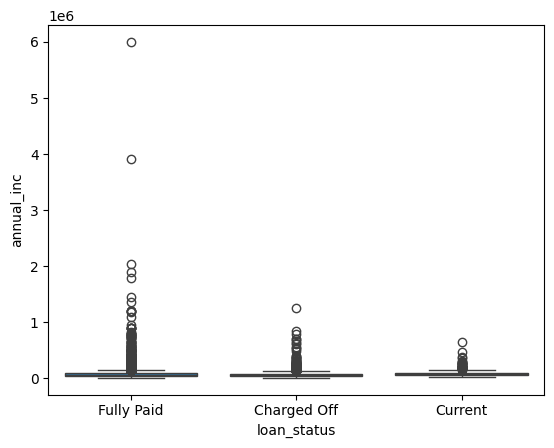

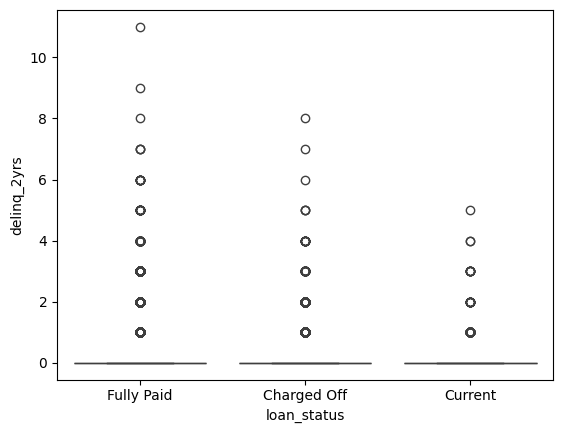

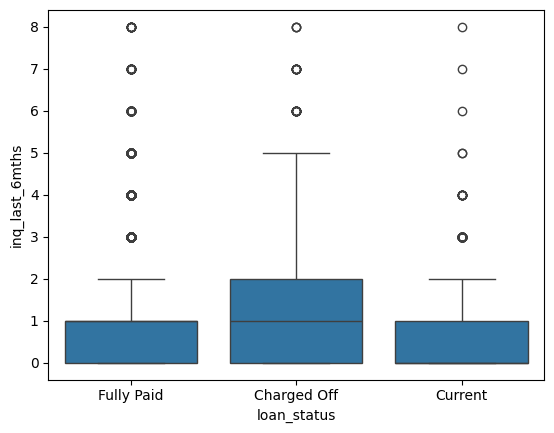

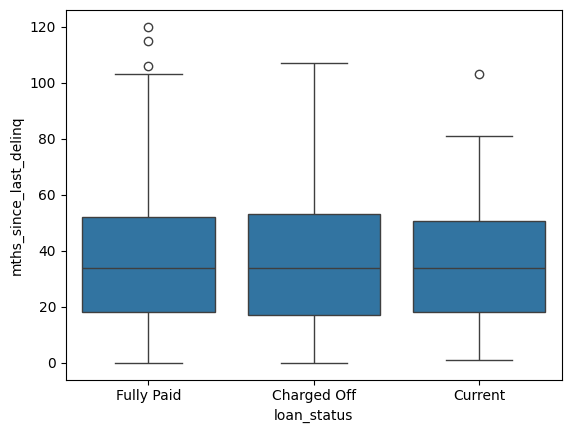

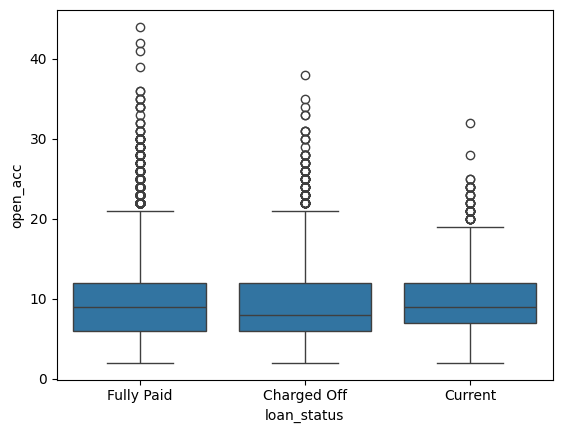

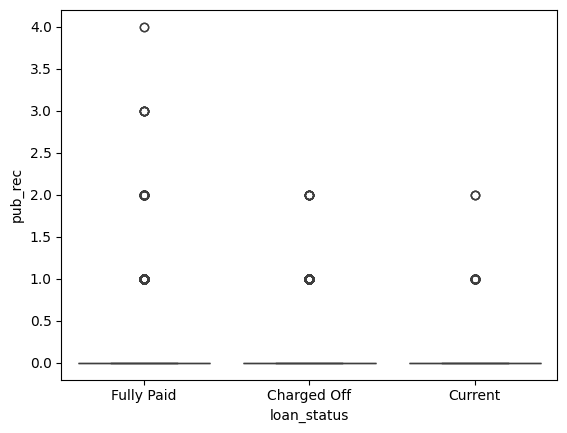

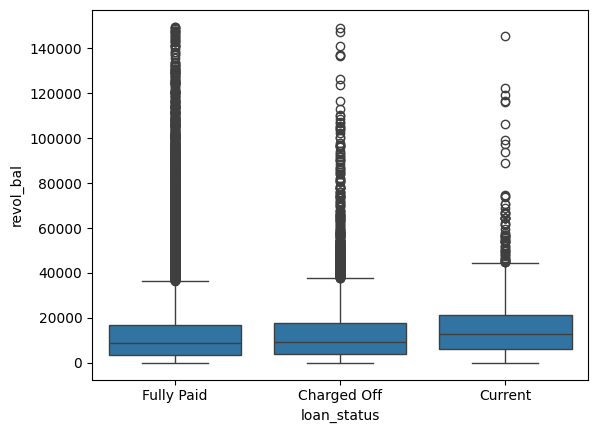

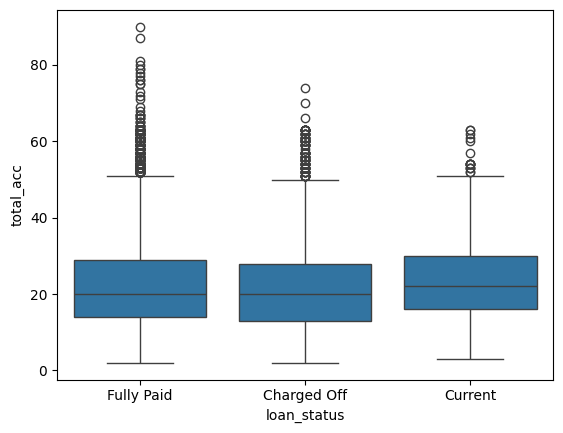

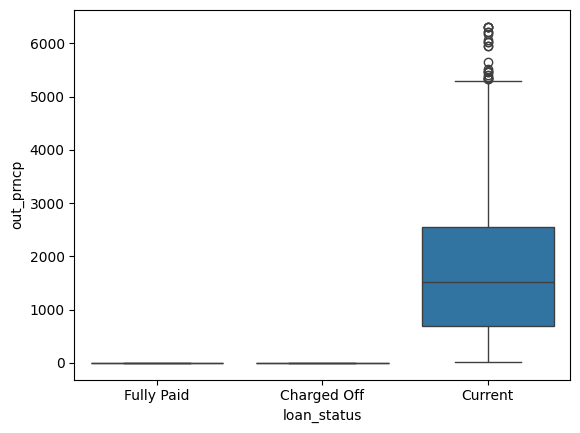

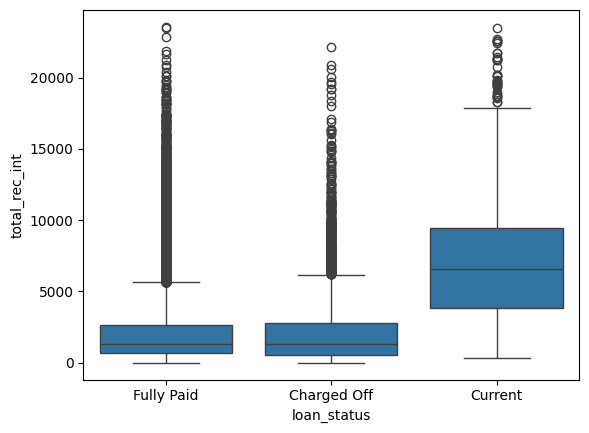

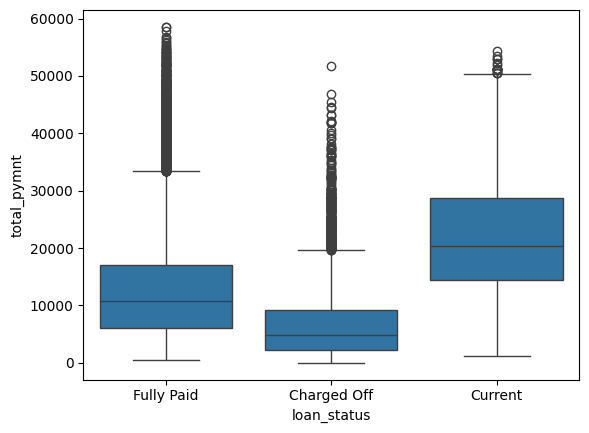

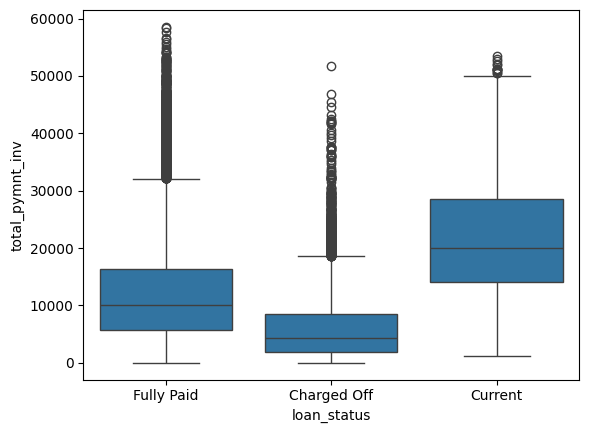

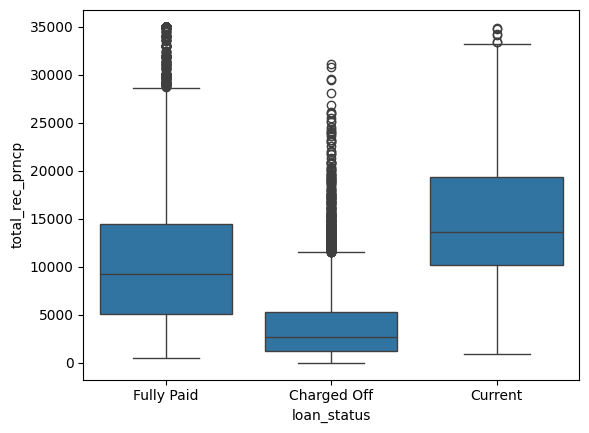

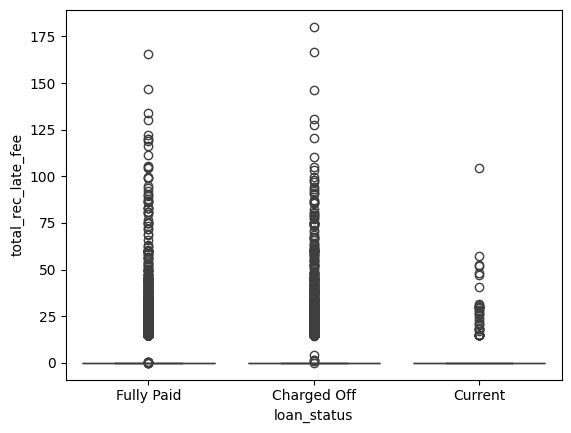

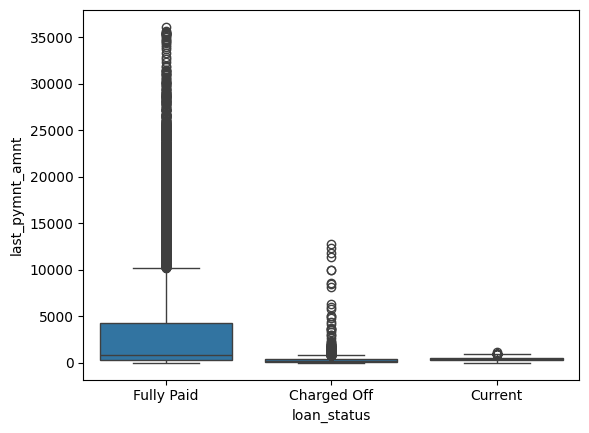

In [41]:
int_columns = ["loan_amnt", "funded_amnt", "installment", "annual_inc", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq",
               "open_acc", "pub_rec", "revol_bal",  "total_acc", "out_prncp", "total_rec_int", "total_pymnt", "total_pymnt_inv",
               "total_rec_prncp", "total_rec_late_fee", "last_pymnt_amnt"]
str_columns = ["term", "grade", 'sub_grade', 'emp_title','emp_length', 'home_ownership', 'emp_length', 'home_ownership','title', 'zip_code', 'addr_state',
                'initial_list_status']
float_columns = ["int_rate", "dti", "revol_util"]
date_columns = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]

# Boxplot comparision of alfloatl attribute for [Default] vs [Paid] vs [Current]
    
for col in float_columns :
    sns.boxplot(x=df1["loan_status"],y=df1[col].astype(float))
    plt.show()

# Boxplot comparision of int attribute for [Default] vs [Paid] vs [Current]

for col in int_columns :
    sns.boxplot(x=df1["loan_status"],y=df1[col])
    plt.show()


## Find attributes coorelation  using heatmap


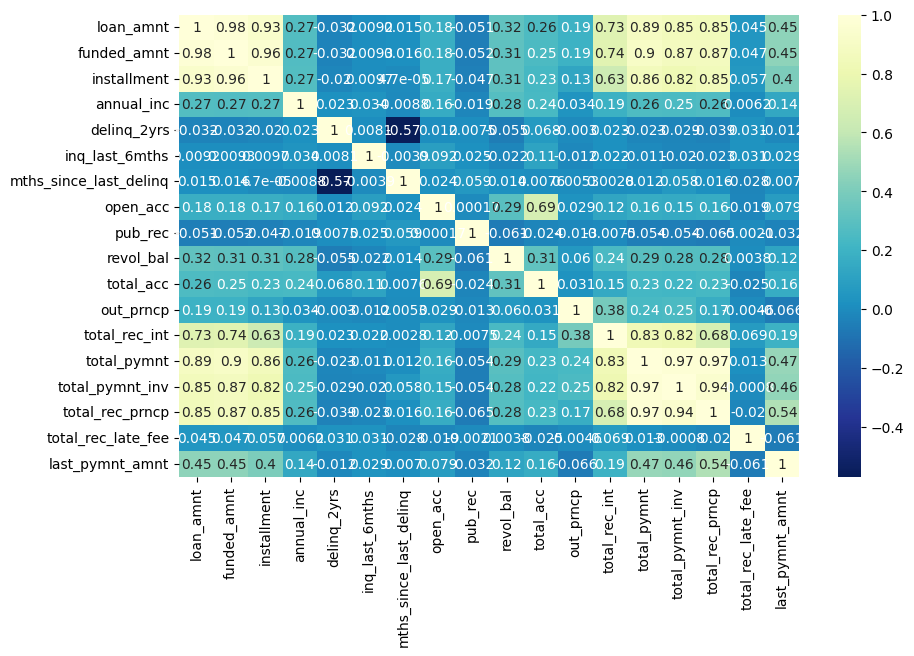

In [42]:
int_columns = ["loan_amnt", "funded_amnt", "installment", "annual_inc", "delinq_2yrs", "inq_last_6mths", "mths_since_last_delinq",
               "open_acc", "pub_rec", "revol_bal",  "total_acc", "out_prncp", "total_rec_int", "total_pymnt", "total_pymnt_inv",
               "total_rec_prncp", "total_rec_late_fee", "last_pymnt_amnt"]
str_columns = ["term", "grade", 'sub_grade', 'emp_title','emp_length', 'home_ownership', 'emp_length', 'home_ownership','title', 'zip_code', 'addr_state',
                'initial_list_status']
float_columns = ["int_rate", "dti", "revol_util"]
date_columns = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]

plt.figure(figsize=(10,6))
sns.heatmap(df[int_columns].corr(),annot=True,cmap="YlGnBu_r")
plt.show()

